In [74]:
#Importing all the necessary libraries
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.plotly as py
plotly.tools.set_credentials_file(username='bhavya_269', api_key='U0sHnWdE7dyxU8lGEOer')
import plotly.graph_objs as go
from datetime import datetime


In [44]:
start = dt.datetime(2014,1,1)
end = dt.datetime(2018,4,10)

df = web.DataReader('TSLA', 'morningstar', start, end)
#print (df.head())

df.to_csv('tsla.csv')

In [45]:
#Reading the tesla file from the csv we made
tesla = pd.read_csv('tsla.csv')
tesla.head()

,Symbol,Date,Close,High,Low,Open,Volume
0,TSLA,2014-01-01,150.429,150.4290,150.429,150.429,0
1,TSLA,2014-01-02,150.100,152.4769,146.550,149.800,6195355
2,TSLA,2014-01-03,149.560,152.1900,148.601,150.000,4698839
3,TSLA,2014-01-06,147.000,150.4000,145.240,150.000,5367320
4,TSLA,2014-01-07,149.360,150.4000,145.250,147.580,5041806


In [46]:
#Checking for what is the type of columns and also coverting date colume into datetime to extract year from the same. 
tesla.dtypes
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla['Year'] = tesla['Date'].dt.year

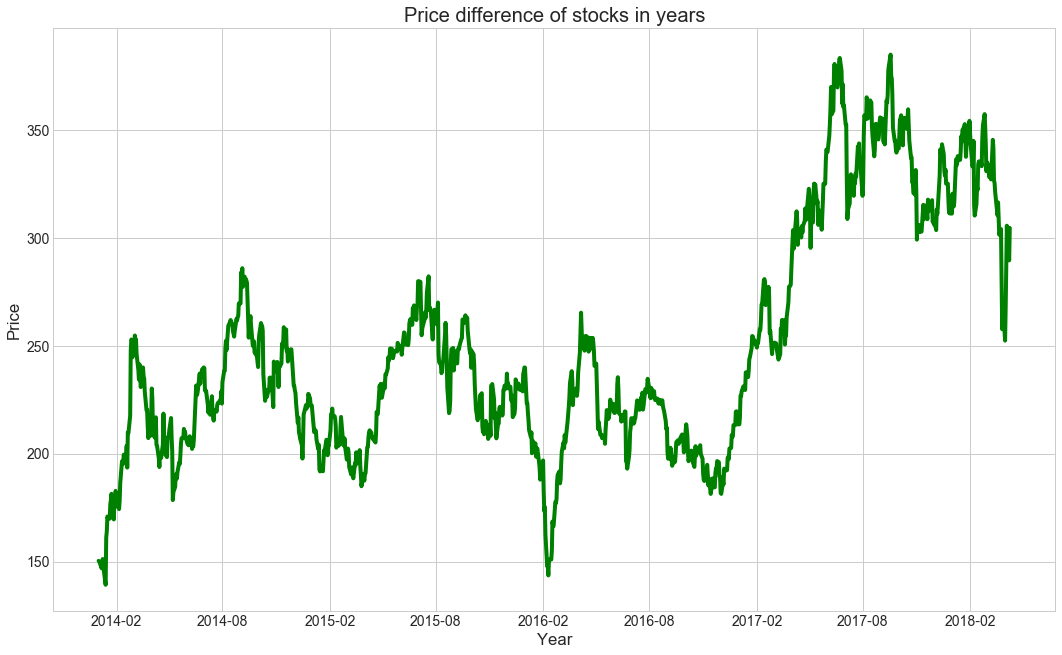

In [47]:
#Plot showing price variations of stocks in different years 
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,10))
plt.plot(tesla['Date'],tesla['Close'], color='green')
plt.ylabel('Price')
plt.xlabel('Year')
plt.title('Price difference of stocks in years')
plt.show()

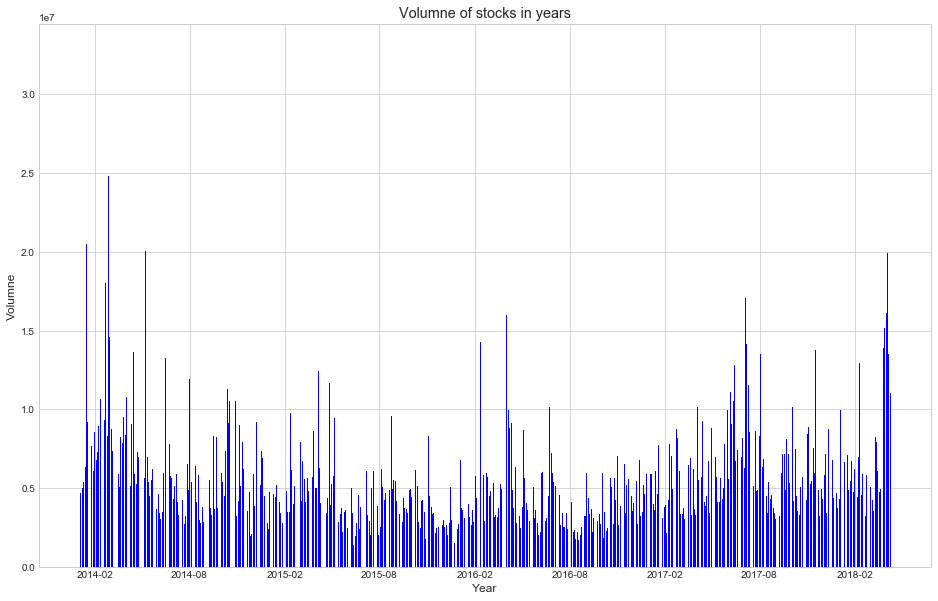

In [83]:
#Plot showing volumn of stocks in years and infering that the volumn has reduced from 2014 to 2018
plt.figure(figsize=(16,10))
plt.bar(tesla['Date'],tesla['Volume'], color='blue')
plt.ylabel('Volumne')
plt.xlabel('Year')
plt.title('Volumne of stocks in years')
plt.show()

In [19]:
#Candlestick graph made with plotly indicating all open,close and high low points in a paticular day.
import plotly.plotly as py
plotly.tools.set_credentials_file(username='bhavya_269', api_key='U0sHnWdE7dyxU8lGEOer')
import plotly.graph_objs as go
from datetime import datetime
trace = go.Candlestick(x=tesla.Date,
                       open=tesla.Open,
                       high=tesla.High,
                       low=tesla.Low,
                       close=tesla.Close)
data = [trace]
py.iplot(data, filename='simple_candlestick')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~bhavya_269/0 or inside your plot.ly account where it is named 'simple_candlestick'


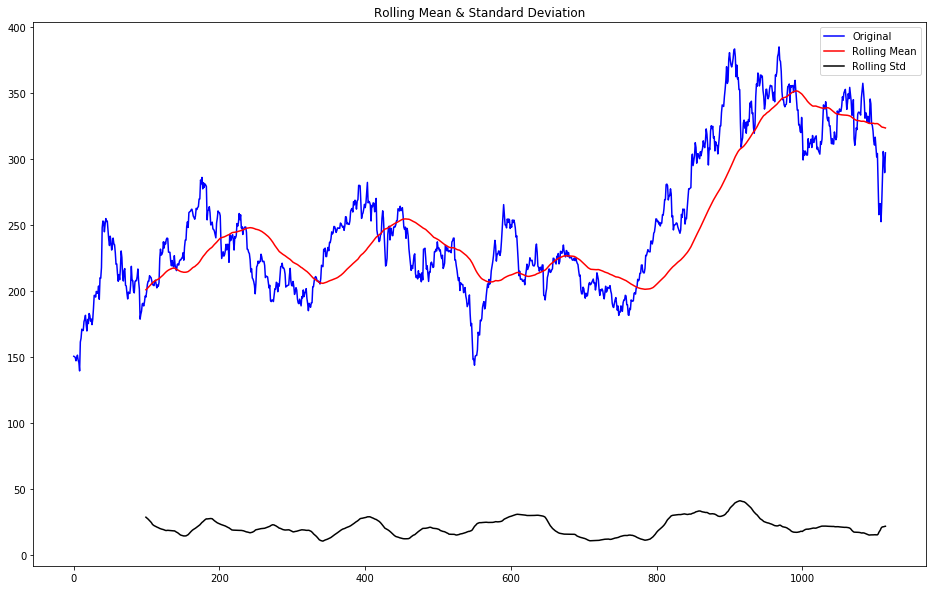

In [13]:
#Not a stationary data as the mean is clearly increasing with time. We can also check that witht the DDickey-Fuller test
plt.figure(figsize=(16,10))
orig = plt.plot(tesla['Close'], color='blue',label='Original')
mean = plt.plot(tesla['Large_MA'], color='red', label='Rolling Mean')
std = plt.plot(tesla['Std_MA'], color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [75]:
train['Month'] = train['Date'].dt.month

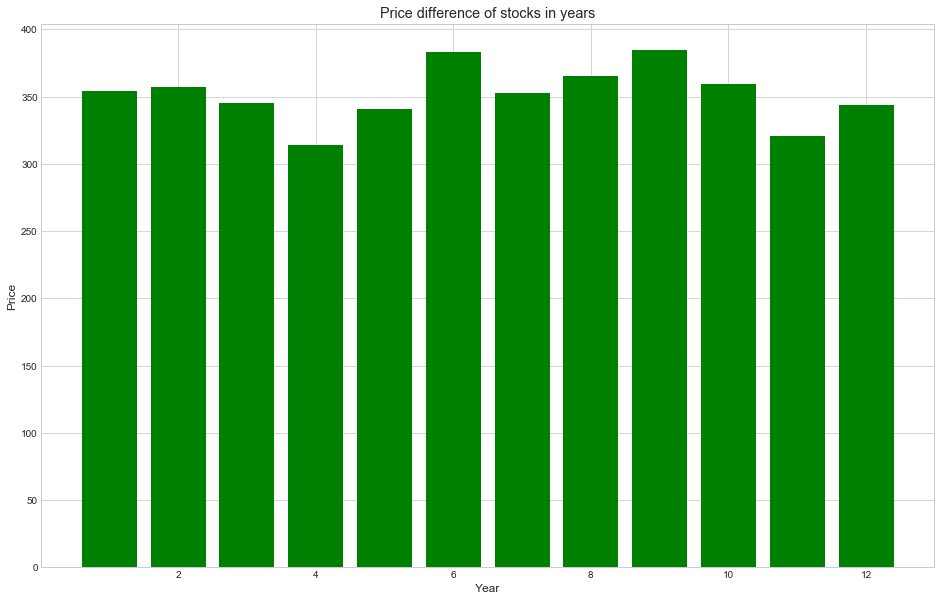

In [76]:
#Plot to determine if there is any relation between the month of the year and price of the stock.
plt.figure(figsize=(16,10))
plt.bar(train['Month'],train['Close'], color='green')
plt.ylabel('Price')
plt.xlabel('Year')
plt.title('Price difference of stocks in years')
plt.show()

In [48]:
start = dt.datetime(2014,1,1)
end = dt.datetime(2018,4,10)
general_motors = web.DataReader("GM", "morningstar", start, end)
ford_motor = web.DataReader('F', 'morningstar', start, end)

#google = web.DataReader("GOOG", "yahoo", start, end)

In [49]:
general_motors.to_csv('general.csv')
ford_motor.to_csv('ford.csv')

In [50]:
general = pd.read_csv('general.csv')
general['Date'] = pd.to_datetime(general['Date'])
ford = pd.read_csv('ford.csv')
ford['Date'] = pd.to_datetime(ford['Date'])

Text(0.5,1,'Stock comparison between Ford, GM and Tesla')

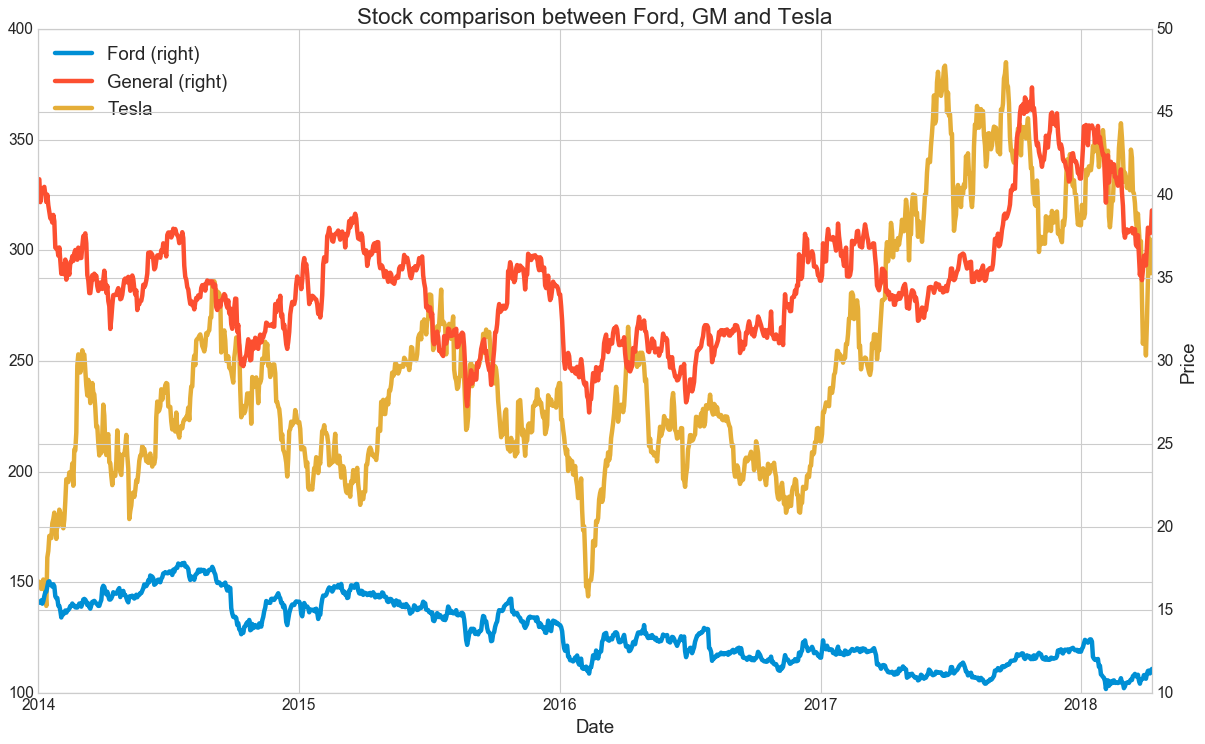

In [94]:
#comparing tesla's price with its competitors.
#here we can clearly see that ford has been quite a constant company in terms of its share proce however tesla and general motors
# are very volatile.
plt.style.use('seaborn-whitegrid')
stocks = pd.DataFrame({"Date": tesla['Date'],"General": general["Close"],
                      "Tesla": tesla["Close"],
                      "Ford": ford["Close"]})

stocks.index = stocks.Date
del stocks['Date']
stocks.head()
stocks.plot(secondary_y = ['General', 'Ford'],grid=True, figsize=(16,10))
plt.ylabel('Price')
plt.title('Stock comparison between Ford, GM and Tesla')

In [96]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
x1 = tesla['Close']
x2 = general['Close']
x2 = sm.add_constant(x2)
model = smf.OLS(x1,x2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     325.5
Date:                Wed, 25 Apr 2018   Prob (F-statistic):           4.99e-64
Time:                        15:52:43   Log-Likelihood:                -5871.0
No. Observations:                1115   AIC:                         1.175e+04
Df Residuals:                    1113   BIC:                         1.176e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6278     13.079      1.118      0.264     -11.034      40.289
Close          6.7335      0.373     18.042      0.000       6.001       7.466
==============================================================================
Omnibus:                       21.688   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.123
Skew:                           0.309   Prob(JB):                     9.53e-06
Kurtosis:                       3.342   Cond. No.                         327.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
plt.style.use('seaborn-whitegrid')
stocks = pd.DataFrame({"General": general["Close"],
                      "Tesla": tesla["Close"],
                      "Ford": ford["Close"]})
stocks.head()
#stocks.index = stocks['date']
#stocks.plot(secondary_y = ['General', 'Ford'],grid=True, figsize=(16,10))

#plt.plot(tesla['Date'],stocks)
#plt.ylabel('Price')
#plt.title('Stock comparison between Ford, GM and Tesla')

,Ford,General,Tesla
0,15.43,40.87,150.429
1,15.44,40.95,150.100
2,15.51,39.57,149.560
3,15.58,40.40,147.000
4,15.38,40.20,149.360


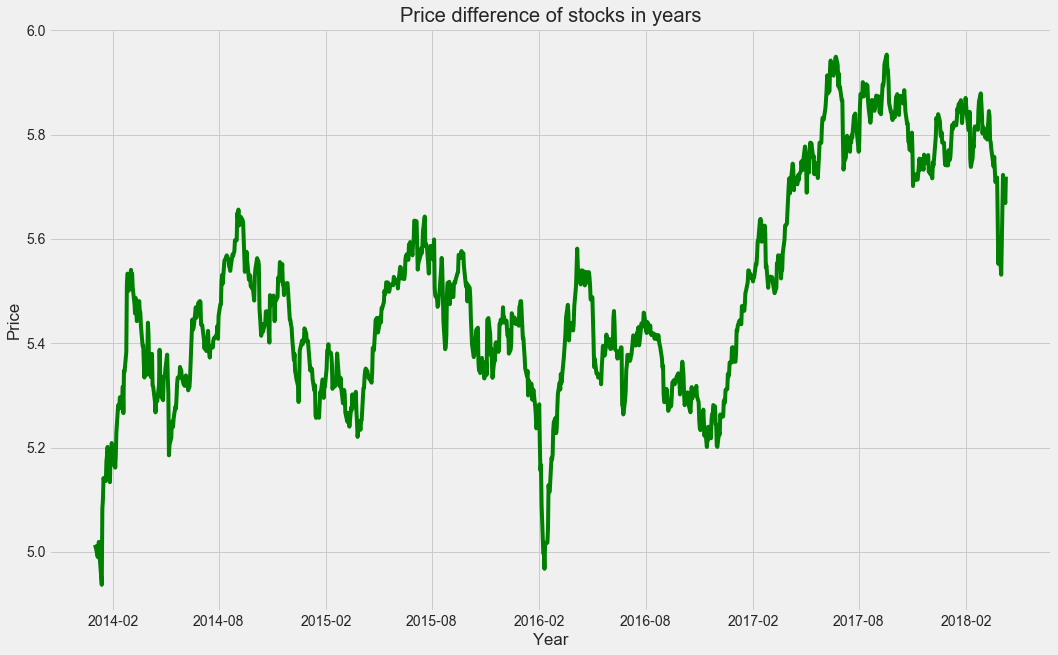

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,10))
plt.plot(tesla['Date'],np.log(tesla['Close']), color='green')
plt.ylabel('Price')
plt.xlabel('Year')
plt.title('Price difference of stocks in years')
plt.show()

In [111]:
tesla1 = tesla
tesla1['new_close'] = np.diff(np.log(tesla['Close']))

ValueError: Length of values does not match length of index

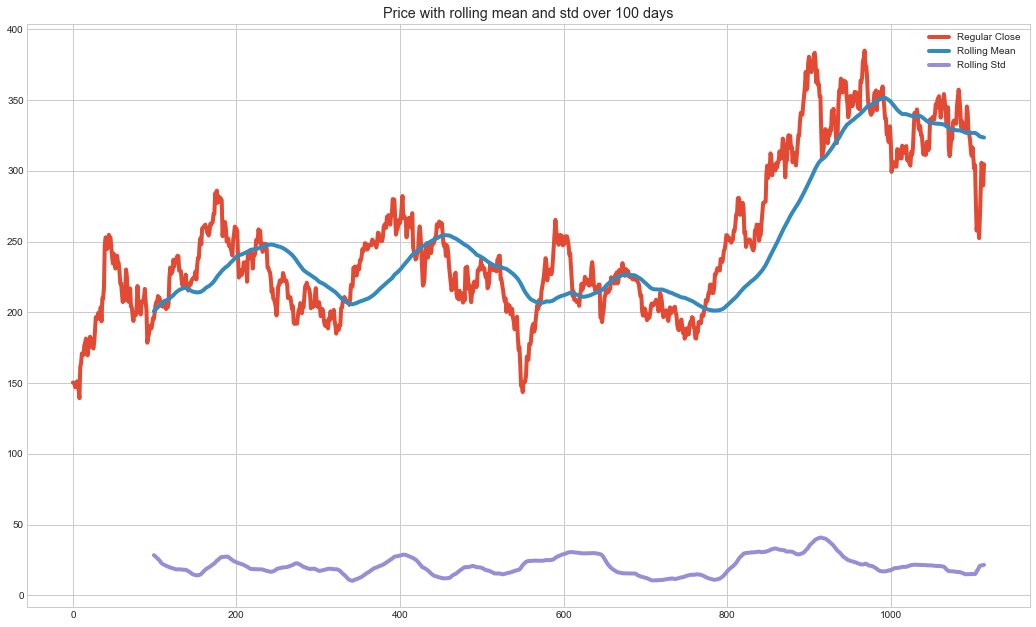

In [58]:
#Showing stationary data distribution a there is no trend with time in the prices of stocks.
plt.figure(figsize=(16,10))
tesla['Close'].plot(label='Regular Close')
tesla['Close'].rolling(window=100).mean().plot(label='Rolling Mean')
tesla['Close'].rolling(window=100).std().plot(label='Rolling Std')
plt.title('Price with rolling mean and std with window of 100')
plt.legend()

In [22]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [24]:
tesla1=tesla
tesla1['log_price'] = np.log(tesla1['Close'])

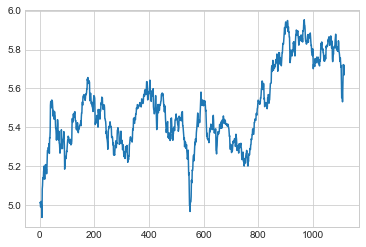

In [25]:
tesla1['log_price'].plot()

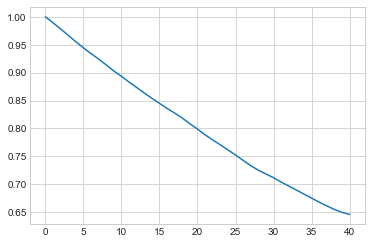

In [27]:
acf_1 =  acf(tesla1['log_price'])
plt.plot(acf_1)
plt.show()


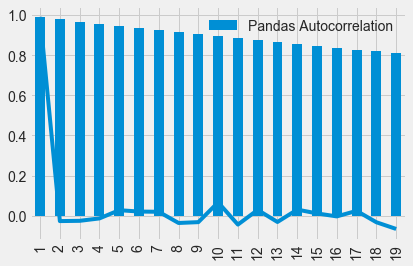

(-2.6692917679631694,
 0.0795045340716019,
 1,
 1113,
 {'1%': -3.43623899001216,
  '10%': -2.5681544778162837,
  '5%': -2.864140302295943},
 -5014.596920766976)

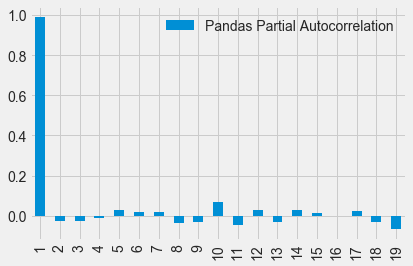

In [126]:
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 =  pacf(tesla1['log_price'])[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
result = ts.adfuller(tesla1['log_price'], 1)
result

Dickey-fuller-test to check if the stock price data is stationary or not
As test statistics is greater than all the critical values it says that the data we do not have enogh evidence to
reject null hypothesis and thus the data is non-stationary

In [21]:
#p value > 0.05 so not stationary
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('tsla.csv', header=0)
X = tesla['Close'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.344156
p-value: 0.158122
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


We try to do the first order differencing of the the data and then found out that the test statistic value is much
less than the cricial value hence proving that we have enough evidence to reject null hypothesis thus the data is stationary now. We can see the same in the below plot which says that the data is almost stationary.

In [30]:
# p value less than 0.05 so staionary
X1 = tesla['Close'].diff()[1:]
X1 = X1.values
result = adfuller(X1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -31.929963
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


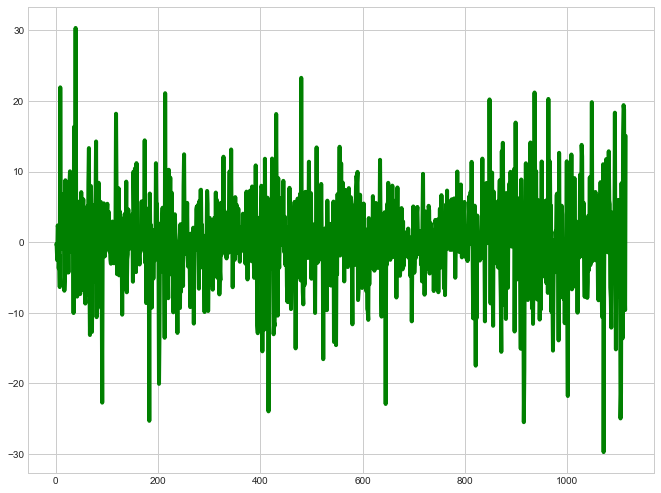

In [70]:
X1 = tesla['Close'].diff()[1:]
plt.figure(figsize=(10,8))
X1.plot(color='green')

In [36]:
tesla.head()

,Symbol,Date,Close,High,Low,Open,Volume,Year,Large_MA,Std_MA,log_price
0,TSLA,2014-01-01,150.429,150.4290,150.429,150.429,0,2014,NaN,NaN,5.013491
1,TSLA,2014-01-02,150.100,152.4769,146.550,149.800,6195355,2014,NaN,NaN,5.011302
2,TSLA,2014-01-03,149.560,152.1900,148.601,150.000,4698839,2014,NaN,NaN,5.007698
3,TSLA,2014-01-06,147.000,150.4000,145.240,150.000,5367320,2014,NaN,NaN,4.990433
4,TSLA,2014-01-07,149.360,150.4000,145.250,147.580,5041806,2014,NaN,NaN,5.006359


Now after we have made the dataset stationary we can move ahead with the rest of our proedictions 

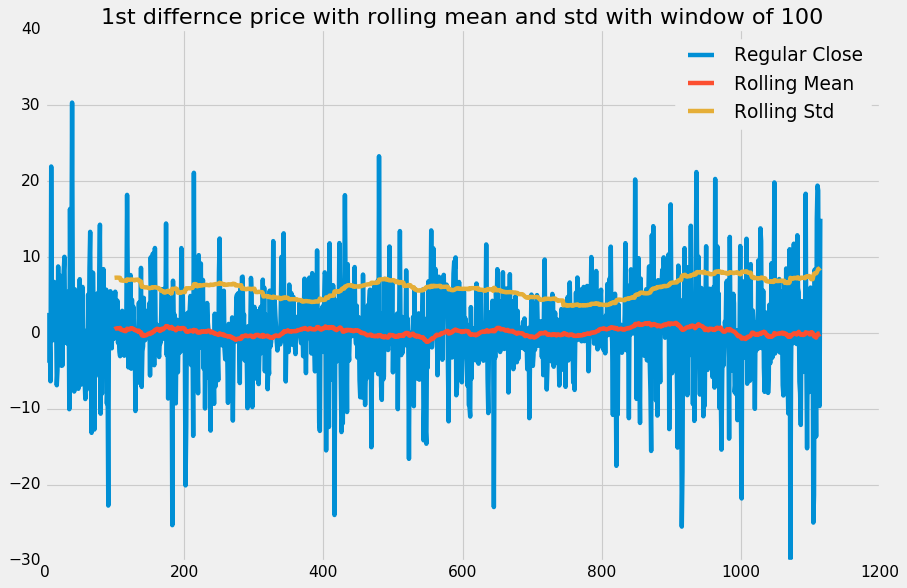

In [81]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
X1.plot(label='Regular Close')
X1.rolling(window=100).mean().plot(label='Rolling Mean')
X1.rolling(window=100).std().plot(label='Rolling Std')
plt.title('1st difference price with rolling mean and std with window of 100')
plt.legend()